In [4]:
import warnings #Using this to avoid clustering in outputs
warnings.filterwarnings('ignore', category=RuntimeWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [5]:
import pandas as pd
df = pd.read_csv('dataset.csv', index_col = None)
print(df)

     f1   f2  f3  f4   f5    f6     f7  target
0     6  148  72  35    0  33.6  0.627       1
1     1   85  66  29    0  26.6  0.351       0
2     8  183  64   0    0  23.3  0.672       1
3     1   89  66  23   94  28.1  0.167       0
4     0  137  40  35  168  43.1  2.288       1
..   ..  ...  ..  ..  ...   ...    ...     ...
761   9   89  62   0    0  22.5      e       0
762  10  101  76  48  180     d  0.171       0
763   2  122  70  27    b  36.8   0.34       0
764   c  121  72  23  112  26.2  0.245       0
765   1  126  60   a    0  30.1  0.349       1

[766 rows x 8 columns]


In [6]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
print(df)

      f1     f2  f3    f4     f5    f6     f7  target
0    6.0  148.0  72  35.0    0.0  33.6  0.627       1
1    1.0   85.0  66  29.0    0.0  26.6  0.351       0
2    8.0  183.0  64   0.0    0.0  23.3  0.672       1
3    1.0   89.0  66  23.0   94.0  28.1  0.167       0
4    0.0  137.0  40  35.0  168.0  43.1  2.288       1
..   ...    ...  ..   ...    ...   ...    ...     ...
755  1.0  128.0  88  39.0  110.0  36.5  1.057       1
756  7.0  137.0  90  41.0    0.0  32.0  0.391       0
757  0.0  123.0  72   0.0    0.0  36.3  0.258       1
758  1.0  106.0  76   0.0    0.0  37.5  0.197       0
759  6.0  190.0  92   0.0    0.0  35.5  0.278       1

[760 rows x 8 columns]


In [7]:
statistics = df.describe() #Used from Assignment 1
print(statistics)
correlation_matrix = df.corr()
print(correlation_matrix)

               f1          f2          f3          f4          f5          f6  \
count  760.000000  760.000000  760.000000  760.000000  760.000000  760.000000   
mean     3.834211  120.969737   69.119737   20.507895   80.234211   31.998684   
std      3.364762   32.023301   19.446088   15.958029  115.581444    7.899724   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   63.500000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   36.000000   32.000000   
75%      6.000000  141.000000   80.000000   32.000000  128.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

               f7      target  
count  760.000000  760.000000  
mean     0.473250    0.350000  
std      0.332277    0.477284  
min      0.078000    0.000000  
25%      0.243750    0.000000  
50%      0.375500    0.000000  
75%      0.627500    1.000000  
max      2.420

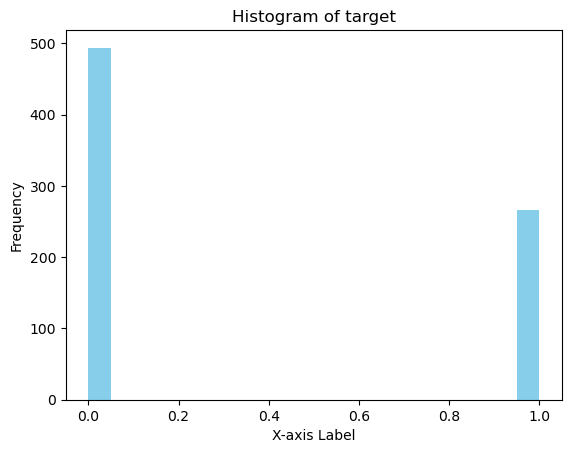

In [8]:
import numpy as np
import matplotlib.pyplot as plt

df['target'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Histogram of target')
plt.xlabel('X-axis Label')
plt.ylabel('Frequency')
plt.show()

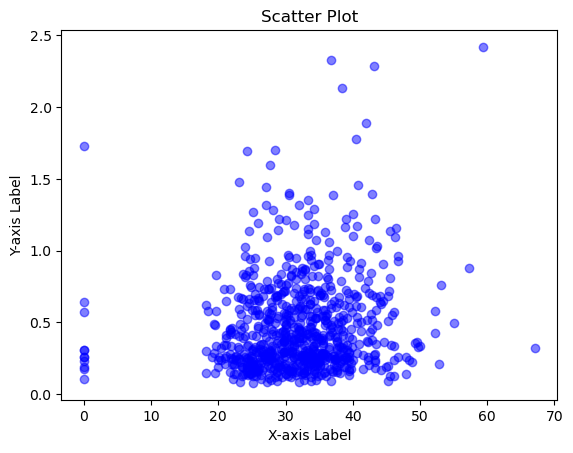

In [9]:
x = df['f6']
y = df['f7']

plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

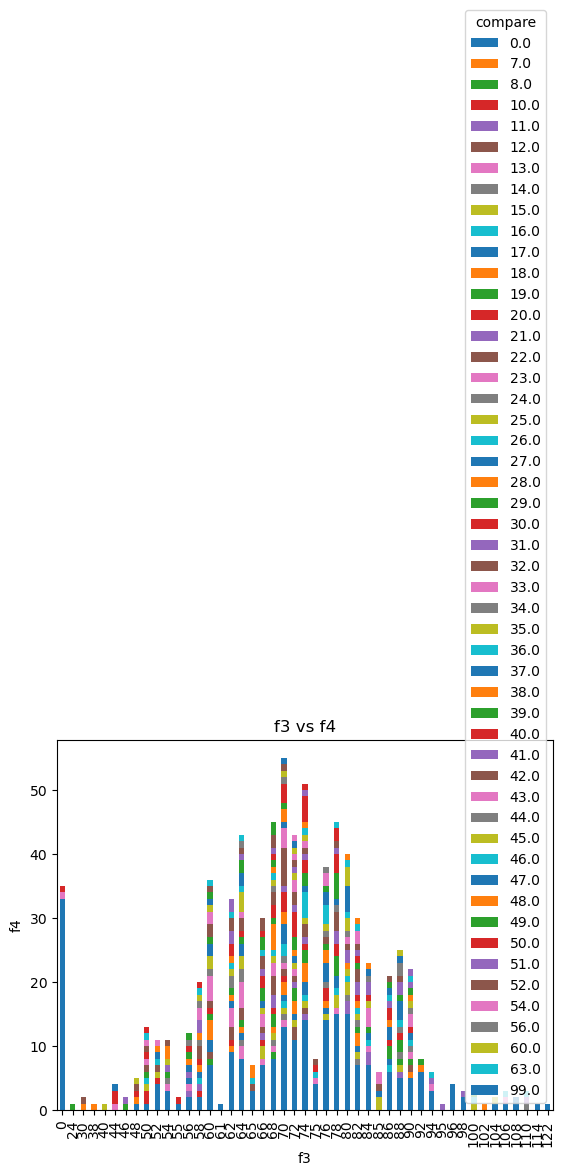

In [10]:
df.groupby(['f3', 'f4']).size().unstack().plot(kind='bar', stacked=True)
plt.title('f3 vs f4')
plt.xlabel('f3')
plt.ylabel('f4')
plt.legend(title='compare')
plt.show()

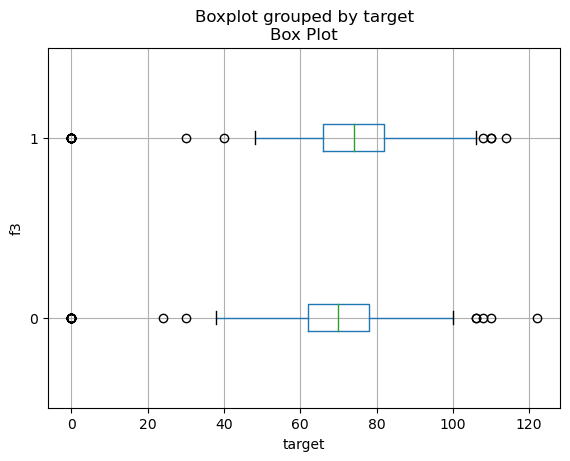

In [11]:
df.boxplot(column='f3', by='target', vert=False)
plt.xlabel('target')
plt.ylabel('f3')
plt.title('Box Plot')
plt.show()

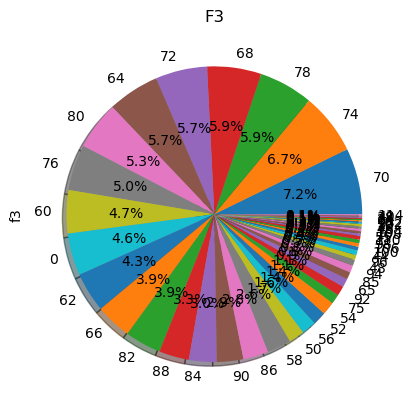

In [12]:
df['f3'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('F3')
plt.show()

In [13]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
print(pd.isnull(df).sum())
df.to_csv('encoded_dataset.csv', index=False)

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64


In [14]:
min_values = df.min()
max_values = df.max()

print("Min Values:")
print(min_values)
print("\nMax Values:")
print(max_values)
normalized_df = (df - min_values) / (max_values - min_values)

print("\nNormalized DataFrame:")
print(normalized_df)

Min Values:
f1        0.000
f2        0.000
f3        0.000
f4        0.000
f5        0.000
f6        0.000
f7        0.078
target    0.000
dtype: float64

Max Values:
f1         17.00
f2        199.00
f3        122.00
f4         99.00
f5        846.00
f6         67.10
f7          2.42
target      1.00
dtype: float64

Normalized DataFrame:
           f1        f2        f3        f4        f5        f6        f7  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
755  0.058824  0.643216  0.721311  0.393939  0.130024  0.543964  0.418019   
756  0.411765  0.688442  0.737705  0.41414

In [15]:
from sklearn.model_selection import train_test_split
X = normalized_df.drop('target', axis=1)
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
print(normalized_df)

           f1        f2        f3        f4        f5        f6        f7  \
0    0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.447236  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
755  0.058824  0.643216  0.721311  0.393939  0.130024  0.543964  0.418019   
756  0.411765  0.688442  0.737705  0.414141  0.000000  0.476900  0.133646   
757  0.000000  0.618090  0.590164  0.000000  0.000000  0.540984  0.076857   
758  0.058824  0.532663  0.622951  0.000000  0.000000  0.558867  0.050811   
759  0.352941  0.954774  0.754098  0.000000  0.000000  0.529061  0.085397   

     target  
0       1.0  
1       0.0  
2       1.0  
3       0.0  
4    

Neural Network Definition

In [17]:
import torch 
import torch.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, dropout, hidden_activation, output_activation, initializer, optimizer):
        super(NeuralNetwork, self).__init__()
        self.optimizer = optimizer
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=dropout)
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.batch_normalization = False
        # self.hidden_layers = []
        self.hidden_layer1 = nn.Linear(in_features=7, out_features=128)
        self.batch_normalization1 = None
        self.hidden_layer2 = nn.Linear(in_features=128, out_features=64)
        self.batch_normalization2 = None
        # self.hidden_layers.append(nn.Linear(in_features=64, out_features=32))
        self.output_layer = nn.Linear(64, 1)
        if initializer == "xavier":
            nn.init.xavier_normal_(self.hidden_layer1.weight)
            nn.init.xavier_normal_(self.hidden_layer2.weight)
            nn.init.xavier_normal_(self.output_layer.weight)
        elif initializer == "he":
            nn.init.kaiming_normal(self.hidden_layer1.weight)
            nn.init.kaiming_normal(self.hidden_layer2.weight)
            nn.init.kaiming_normal(self.output_layer.weight)
        elif initializer == "orthogonal":
            nn.init.orthogonal_(self.hidden_layer1.weight)
            nn.init.orthogonal_(self.hidden_layer2.weight)
            nn.init.orthogonal_(self.output_layer.weight)
        else:
            print("Incorrect Optimizer!!!")
        self.output = nn.Sigmoid()
    
    # def set_batch_norm(batch_norm):
    #     self.batch_normalization = batch_norm 

    def forward(self, x):
        x = self.flatten(x)
        # x = self.dropout(x)
        # x = self.hidden_layers(x)
        x = self.hidden_layer1(x)
        if self.batch_normalization == True:
            x = self.batch_normalization1(x)
        x = self.hidden_activation(x)
        x = self.dropout(x)
        x = self.hidden_layer2(x)
        if self.batch_normalization == True:
            x = self.batch_normalization2(x)
        x = self.hidden_activation(x)

        # x = self.hidden_activation(self.hidden_layers[2](x))
        # x = self.hidden_activation(self.hidden_layers[3](x))
        x = self.output_layer(x)
        output = self.output(x)
        return output

# model = NeuralNetwork(dropout=0.25, hidden_activation=nn.ReLU(), output_activation=nn.Sigmoid(), initializer="xavier") 

In [18]:
def accuracy(y_test, Y_predict): #Using from Assignment 1
    correct_pred = 0
    for test_val, pred_val in zip(y_test, Y_predict):
        if(test_val == pred_val):
            correct_pred +=1
    
    return correct_pred/len(y_test)

Training and Validation

In [21]:
from sklearn.metrics import accuracy_score
print()


x_train_tensor = torch.from_numpy(X_train.to_numpy())
y_train_tensor = torch.from_numpy(y_train.to_numpy())
    
x_val_tensor = torch.from_numpy(X_val.to_numpy())
y_val_tensor = torch.from_numpy(y_val.to_numpy())


def epoch(model, loss, optimizer, early_stop, scheduler):
    training_losses = []
    validation_losses = []
    test_losses = []

    training_accuracies = []
    validation_accuracies = []
    test_accuracies = []

    best_val_accuracy = 0
    best_model = None

    import time
    start_time = time.time()
    print("Start Time: ", start_time)
    print()
    counter = 0
    best_loss = 0
    x_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
    y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.float32))
    for epoch in range(100):
        #Training
        model.train(True)
        train_loss = 0.0
        training_accuracy = 0
        for i in range(0, len(x_train_tensor), 32):
            x = x_train_tensor[i:i+32].to(torch.float32)
            y = y_train_tensor[i:i+32].to(torch.float32)
            predictions = model(x)
            y = y.unsqueeze(1)  
            binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
            training_accuracy += accuracy_score(y.numpy(), binary_values.numpy())
            loss_obj = loss(predictions, y)
            optimizer.zero_grad()
            loss_obj.backward()
            optimizer.step()
            train_loss += loss_obj.item()

        training_losses.append(train_loss / (len(x_train_tensor)/32))
        training_accuracies.append((training_accuracy / (len(x_train_tensor)/32))*100)

        #Evaluation
        validation_loss = 0.0
        model.eval()
        validation_accuracy = 0
        with torch.no_grad():
            for i in range(0, len(x_val_tensor), 32):
                x = x_val_tensor[i:i+32].to(torch.float32)
                targets = y_val_tensor[i:i+32].to(torch.float32)
                predictions = model(x)
                targets = targets.unsqueeze(1)
                binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
                validation_accuracy += accuracy_score(targets.numpy(), binary_values.numpy())
                loss_obj = loss(predictions, targets)
                validation_loss += loss_obj.item()
        validation_accuracy = (validation_accuracy/( len(x_val_tensor)/32)) * 100
        validation_accuracies.append(validation_accuracy)


        if validation_accuracy > best_val_accuracy:
            best_val_accuracy = validation_accuracy
            best_model = model
            counter = 0
        else:
            counter += 1


        if epoch % 30 == 0:
            print("Epoch", epoch, ": {}".format(validation_accuracy))
        validation_loss = validation_loss /( len(x_val_tensor)/32)
        validation_losses.append(validation_loss)

        if scheduler !=None:
            scheduler.step(validation_loss)


        #Testing
        test_loss = 0.0
        test_accuracy = 0
        with torch.no_grad(): #Testing with each epoch to plot the test loss graph
            for i in range(0, len(x_test_tensor), 32):
                x = x_test_tensor[i:i+32].to(torch.float32)
                y = x_test_tensor[i:i+32].to(torch.float32)

                y_test_tensor = y_test_tensor.reshape(-1, )
                predictions = best_model(x_test_tensor)
                y_test_tensor = y_test_tensor.unsqueeze(1)
                binary_values = torch.where(predictions > 0.5, torch.ones_like(predictions), torch.zeros_like(predictions))
                test_accuracy += accuracy_score(y_test_tensor.numpy(), binary_values.numpy())
                loss_obj = loss(predictions, y_test_tensor)
                test_loss += loss_obj.item()
                
        test_losses.append(test_loss /( len(x_test_tensor)/32))
        test_accuracies.append((test_accuracy/( len(x_test_tensor)/32))*100)

        # if early_stop != None:
        #     if(validation_loss < best_loss):
        #         best_loss = validation_loss
        #         counter = 0
        #     else:
        #         counter -= 1
        if early_stop != None and counter > early_stop:
            break


    print()
    end_time = time.time()
    print("End Time: ", start_time)
    print("Train time: ", end_time - start_time)
    print()
    print("Best Validation Accuracy: ", "{}".format(best_val_accuracy)) 

    plt.plot(training_losses, label='Training loss')
    plt.plot(validation_losses, label='Validation loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Training, Validation and Testing losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(training_accuracies, label='Training Accuracy')
    plt.plot(validation_accuracies, label='Validation Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Training, Validation and Testing Accuracies')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.legend()
    plt.show()

    return best_model

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score

def best_model_test(best_model):
    x_test_tensor = torch.from_numpy(X_test.to_numpy(dtype=np.float32))
    y_test_tensor = torch.from_numpy(y_test.to_numpy(dtype=np.float32))
    with torch.no_grad():
            y_test_tensor = y_test_tensor.reshape(-1, )
            test_predictions = best_model(x_test_tensor)

            y_test_tensor = y_test_tensor.unsqueeze(1)

    # print(len(test_predictions))
    prediction_labels = [1 if pred > 0.5 else 0 for pred in test_predictions]
    accuracy_test = accuracy_score(y_test_tensor.numpy(), [1 if pred > 0.5 else 0 for pred in test_predictions])
    precision, recall, fscore, support = precision_recall_fscore_support(y_test_tensor.numpy(), np.array(prediction_labels), average="binary")
    print("Test Accuracy: ", accuracy_test, "\nPrecision: ", precision, "\nRecall: ", recall, "\nF1 score: ", fscore, "\nSupport", support)
    return accuracy_test

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

def best_model_graph(best_model):
    x_val_tensor = torch.from_numpy(X_val.to_numpy())
    y_val_tensor = torch.from_numpy(y_val.to_numpy())
    best_model.eval()
    with torch.no_grad():
        predictions = best_model(x_val_tensor.to(torch.float32))
        predictions = torch.where(predictions > 0.5, 1, 0) 

    cm = confusion_matrix(y_val_tensor, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    true_labels = y_val_tensor.numpy()
    x_val_tensor = x_val_tensor.to(torch.float32)
    predicted_probs = best_model(x_val_tensor).detach().numpy()
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    roc_auc = roc_auc_score(true_labels, predicted_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [24]:
def three_setups(model, optimizer, early_stop, scheduler):
    best_model = epoch(model, nn.BCELoss(), optimizer, early_stop=early_stop, scheduler=scheduler)
    accuracy = best_model_test(best_model=best_model)
    best_model_graph(best_model=best_model)
    return best_model, accuracy

Start Time:  1699568651.0637584

Epoch 0 : 66.51954602774276
Epoch 30 : 80.83228247162674
Epoch 60 : 80.83228247162674
Epoch 90 : 81.65195460277427

End Time:  1699568651.0637584
Train time:  11.28336215019226

Best Validation Accuracy:  82.66078184110971


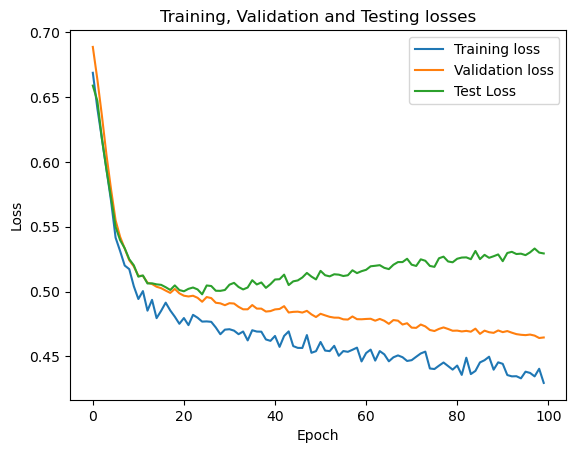

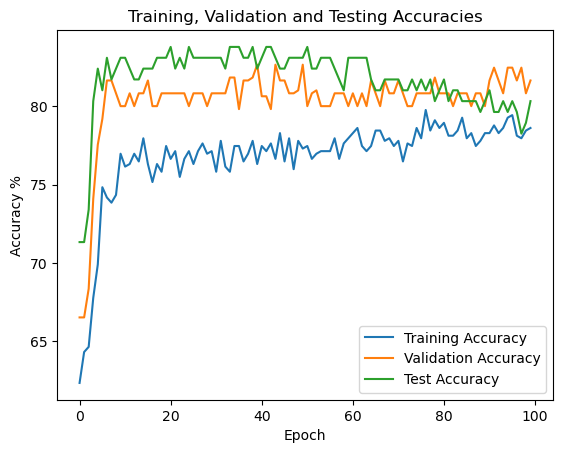

Test Accuracy:  0.7631578947368421 
Precision:  0.6326530612244898 
Recall:  0.6326530612244898 
F1 score:  0.6326530612244898 
Support None


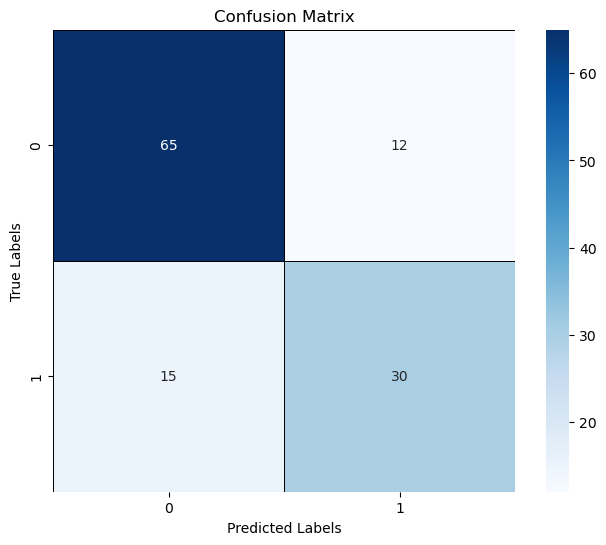

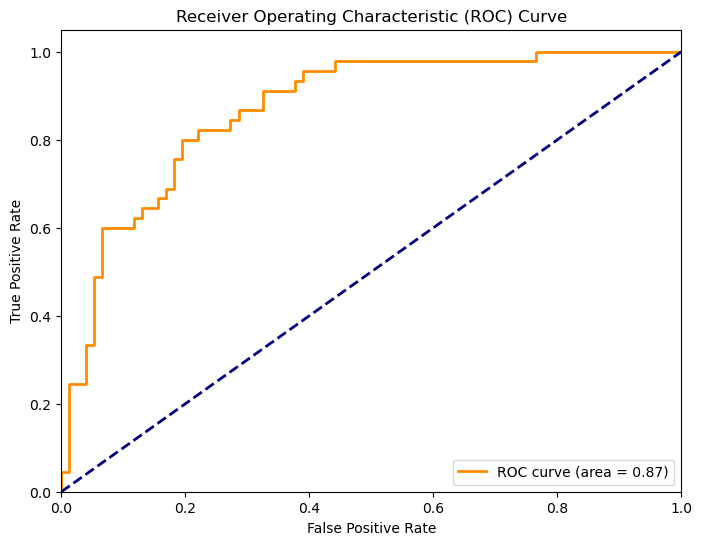

In [25]:
model = NeuralNetwork(dropout=0.15, hidden_activation=nn.ReLU(), output_activation=nn.Sigmoid(), initializer="xavier", optimizer=None) 
optimizer = torch.optim.Adam(model.parameters())#, lr=0.0015, weight_decay=0.01)
best_model1, accuracy1 = three_setups(model=model, optimizer=optimizer, early_stop=None, scheduler = None)
best_model1.optimizer = optimizer
torch.save(best_model1.state_dict(), 'model_weights1.pth')

Start Time:  1699568675.57311

Epoch 0 : 65.5107187894073
Epoch 30 : 77.36443883984869
Epoch 60 : 80.64312736443884
Epoch 90 : 79.8234552332913

End Time:  1699568675.57311
Train time:  11.41687560081482

Best Validation Accuracy:  81.46279949558638


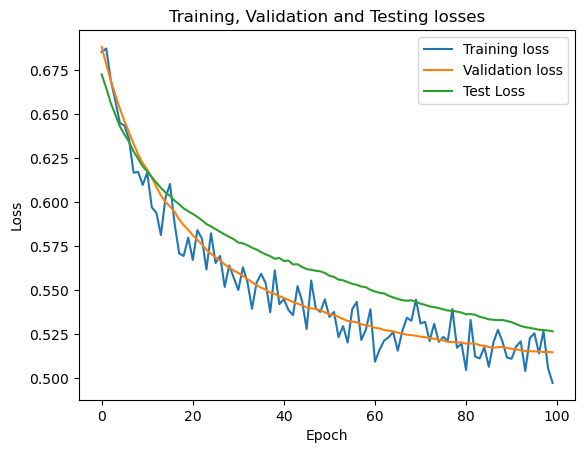

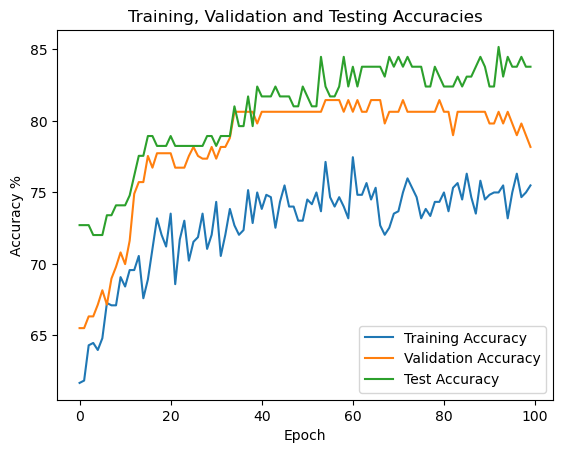

Test Accuracy:  0.7960526315789473 
Precision:  0.78125 
Recall:  0.5102040816326531 
F1 score:  0.617283950617284 
Support None


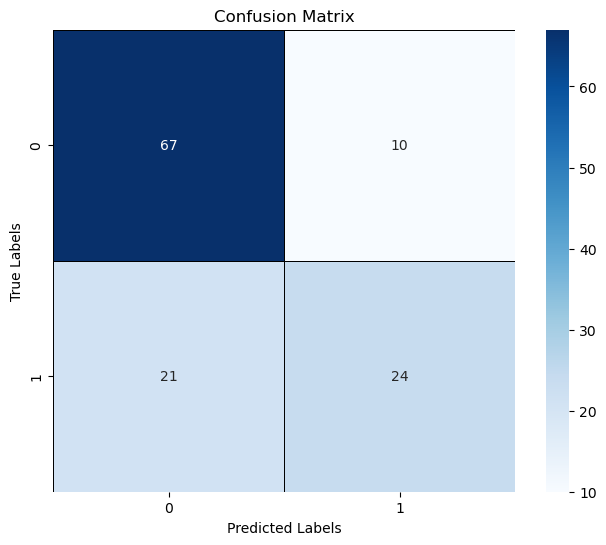

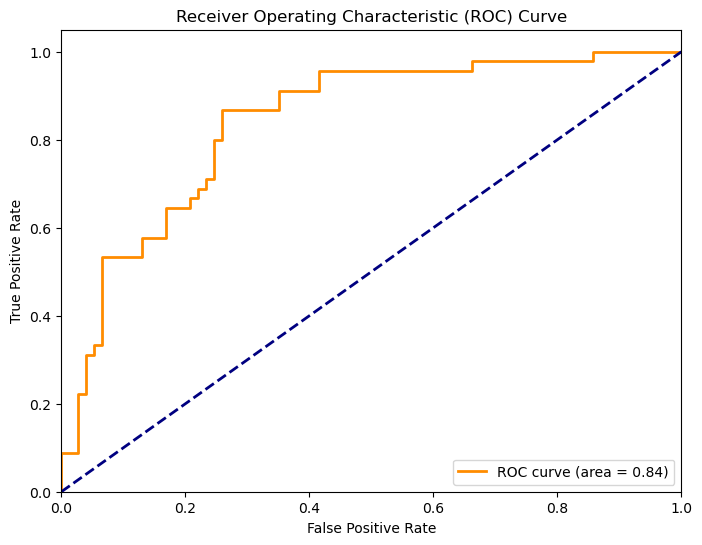

In [26]:
model = NeuralNetwork(dropout=0.3, hidden_activation=nn.ELU(), output_activation=nn.Sigmoid(), initializer="he", optimizer=None) 
optimizer = torch.optim.ASGD(model.parameters())#, lr=0.0015, weight_decay=0.01)

best_model2, accuracy2 = three_setups(model=model, optimizer=optimizer, early_stop=None, scheduler = None)
best_model2.optimizer = optimizer
torch.save(best_model2.state_dict(), 'model_weights2.pth')

Start Time:  1699568692.1106293

Epoch 0 : 66.51954602774276
Epoch 30 : 78.37326607818412
Epoch 60 : 80.20176544766709
Epoch 90 : 81.84110970996217

End Time:  1699568692.1106293
Train time:  12.557268142700195

Best Validation Accuracy:  82.66078184110971


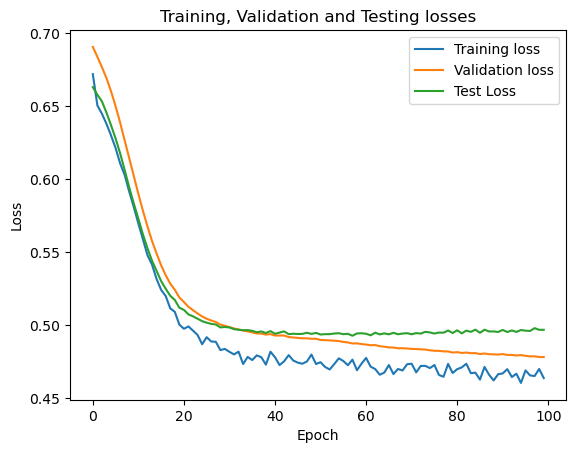

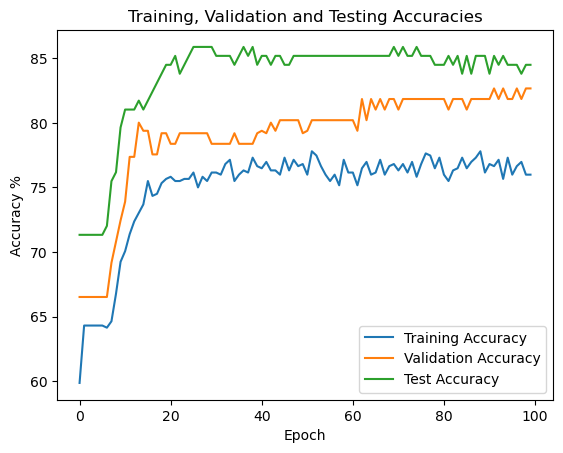

Test Accuracy:  0.8026315789473685 
Precision:  0.7111111111111111 
Recall:  0.6530612244897959 
F1 score:  0.6808510638297872 
Support None


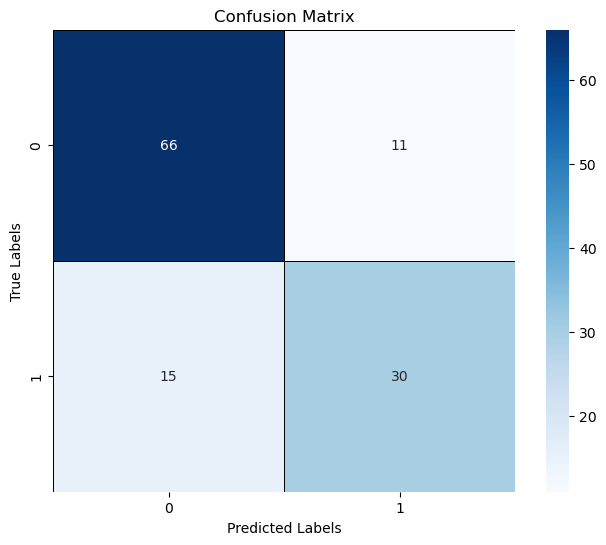

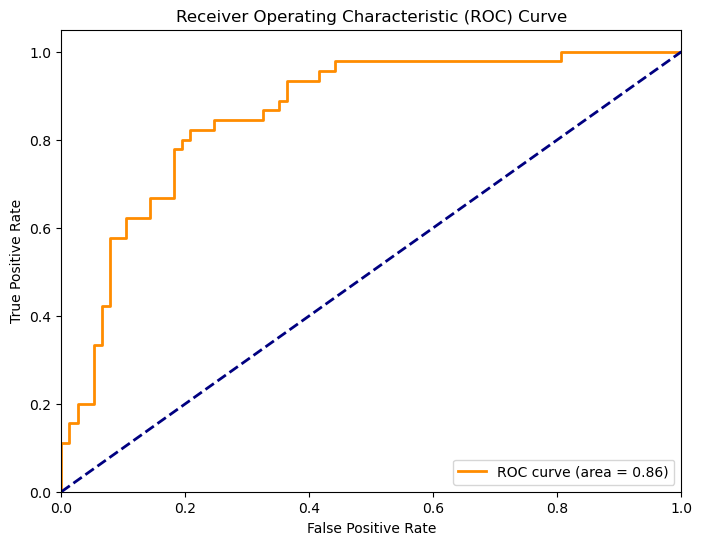

In [27]:
model = NeuralNetwork(dropout=0.05, hidden_activation=nn.LeakyReLU(), output_activation=nn.Sigmoid(), initializer="orthogonal", optimizer=None) 
optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)

best_model3, accuracy3 = three_setups(model = model, optimizer=optimizer, early_stop=None, scheduler = None)
best_model3.optimizer = optimizer
torch.save(best_model3.state_dict(), 'model_weights3.pth')

In [28]:
base_model = None
models = {best_model1:accuracy1, best_model2:accuracy2, best_model3:accuracy3}

for key in models.keys():
    print(models[key], end=" ")

print()

sorted(models, key=models.get, reverse=True)
highest_accuracy = 0
for key in models.keys():
    if models[key] > highest_accuracy:
        base_model = key
        highest_accuracy = models[key]

base_model = list(models.keys())[0]
print(type(base_model))
print('Highest Accuracy: ', highest_accuracy)

0.7631578947368421 0.7960526315789473 0.8026315789473685 
<class '__main__.NeuralNetwork'>
Highest Accuracy:  0.8026315789473685


Optimizing using Early Stopping

Start Time:  1699568717.8383877

Epoch 0 : 80.83228247162674

End Time:  1699568717.8383877
Train time:  3.559936046600342

Best Validation Accuracy:  84.11097099621689


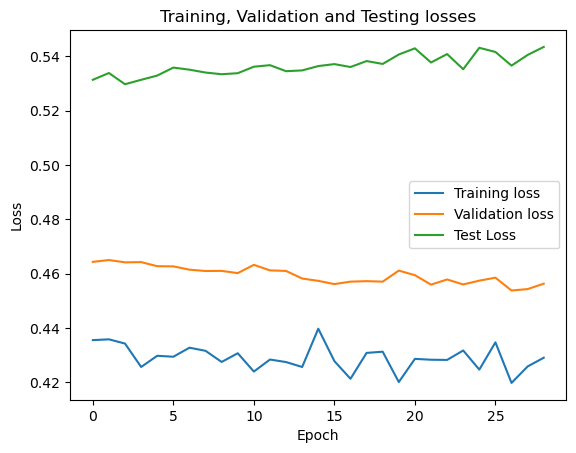

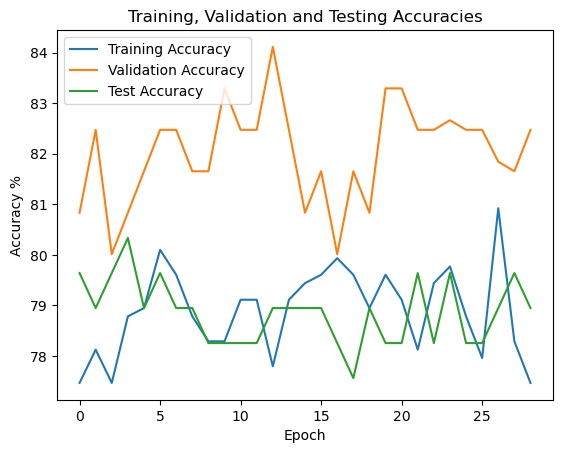

Test Accuracy:  0.75 
Precision:  0.6037735849056604 
Recall:  0.6530612244897959 
F1 score:  0.6274509803921567 
Support None


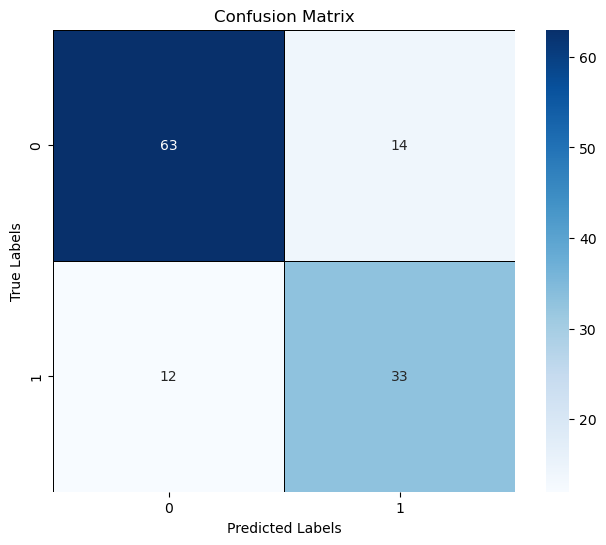

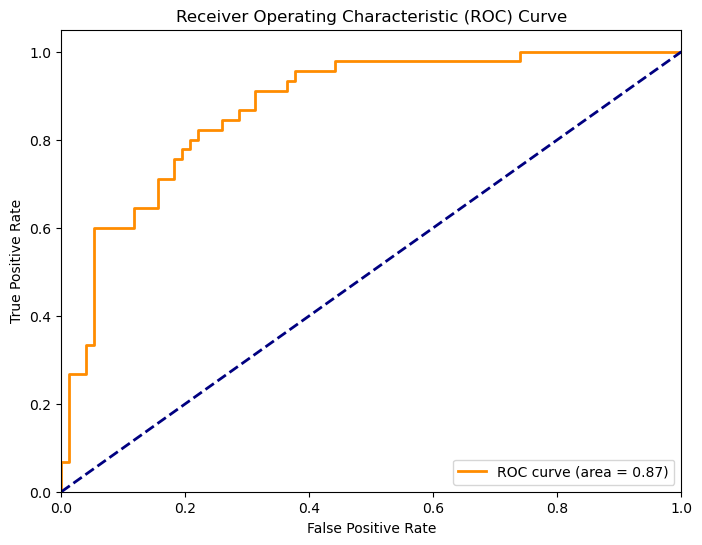

(NeuralNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (dropout): Dropout(p=0.15, inplace=False)
   (hidden_activation): ReLU()
   (output_activation): Sigmoid()
   (hidden_layer1): Linear(in_features=7, out_features=128, bias=True)
   (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
   (output_layer): Linear(in_features=64, out_features=1, bias=True)
   (output): Sigmoid()
 ),
 0.75)

In [29]:
# from ignite.handlers import EarlyStopping
# from ignite.engine import Engine, Events


#Defining 15 here to stop the training if validation accuracy decreases than the highest accuracy for 15 consecutive times

three_setups(base_model, base_model.optimizer, early_stop=15, scheduler = None) 

Optimizing using Learning rate scheduler

Start Time:  1699568730.6403735

Epoch 0 : 81.65195460277427
Epoch 30 : 84.30012610340478
Epoch 60 : 84.30012610340478
Epoch 90 : 84.30012610340478

End Time:  1699568730.6403735
Train time:  11.261186361312866

Best Validation Accuracy:  86.12862547288776


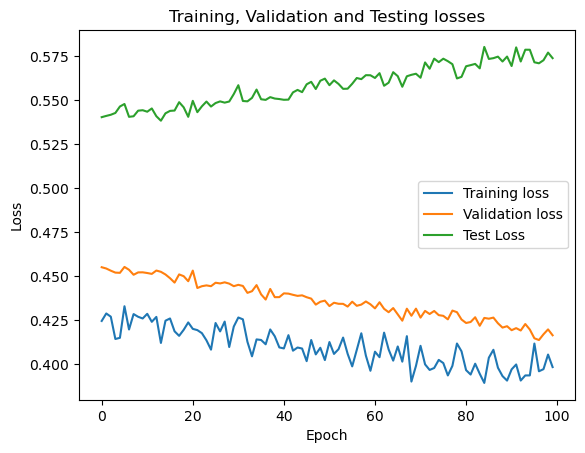

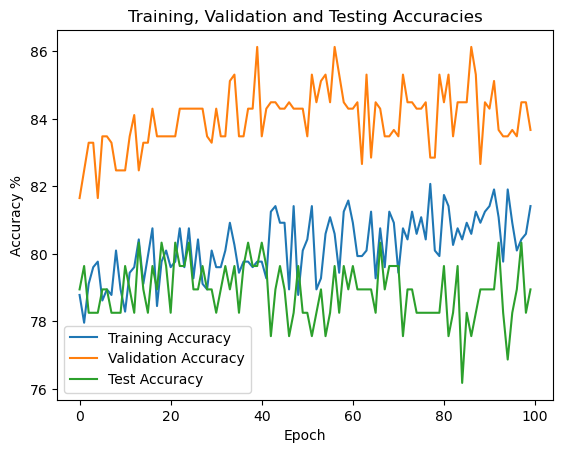

Test Accuracy:  0.75 
Precision:  0.6170212765957447 
Recall:  0.5918367346938775 
F1 score:  0.6041666666666666 
Support None


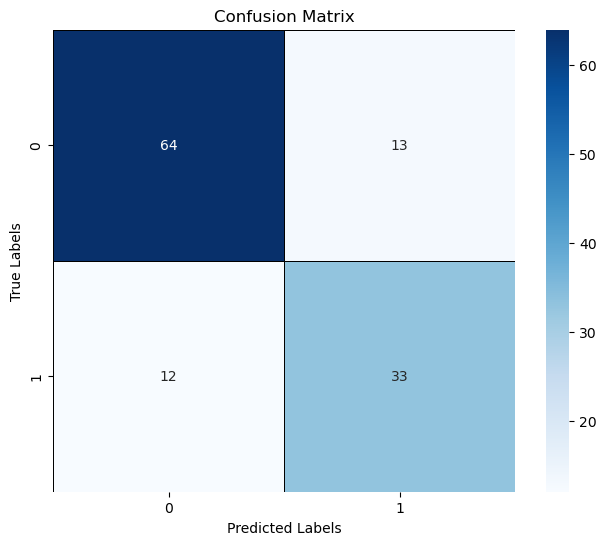

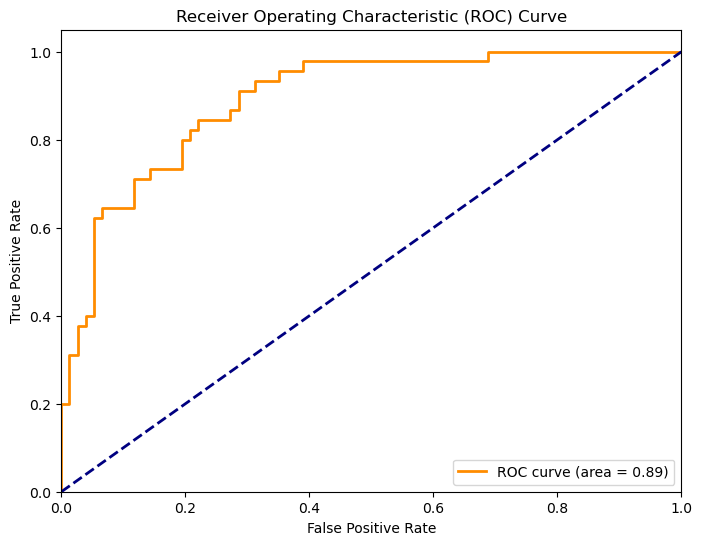

(NeuralNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (dropout): Dropout(p=0.15, inplace=False)
   (hidden_activation): ReLU()
   (output_activation): Sigmoid()
   (hidden_layer1): Linear(in_features=7, out_features=128, bias=True)
   (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
   (output_layer): Linear(in_features=64, out_features=1, bias=True)
   (output): Sigmoid()
 ),
 0.75)

In [30]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, 'min')

three_setups(base_model, base_model.optimizer, early_stop=None, scheduler = scheduler) 

Batch Normalization

Start Time:  1699568750.0982652

Epoch 0 : 74.90542244640605
Epoch 30 : 84.30012610340478
Epoch 60 : 87.76796973518285
Epoch 90 : 86.7591424968474

End Time:  1699568750.0982652
Train time:  12.13476300239563

Best Validation Accuracy:  89.40731399747793


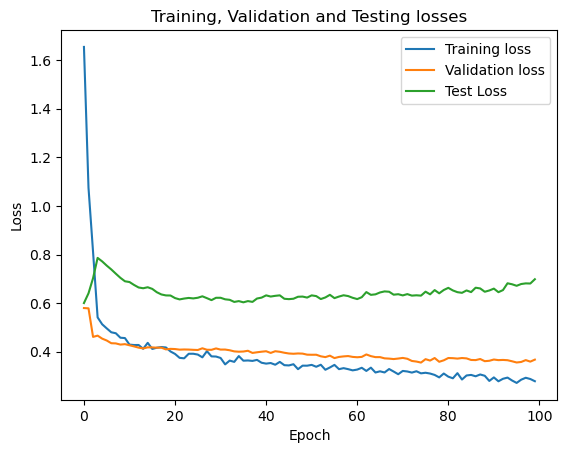

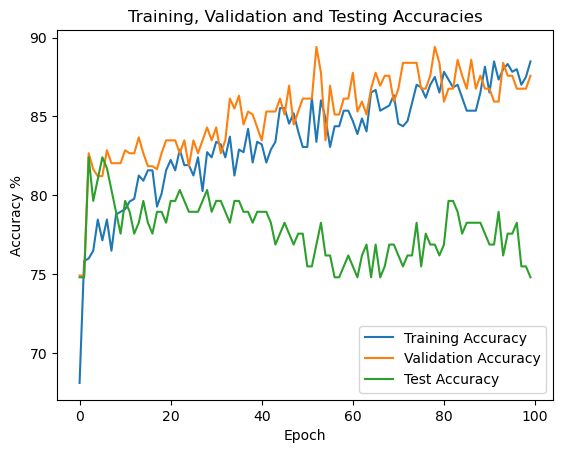

Test Accuracy:  0.7105263157894737 
Precision:  0.5454545454545454 
Recall:  0.6122448979591837 
F1 score:  0.5769230769230769 
Support None


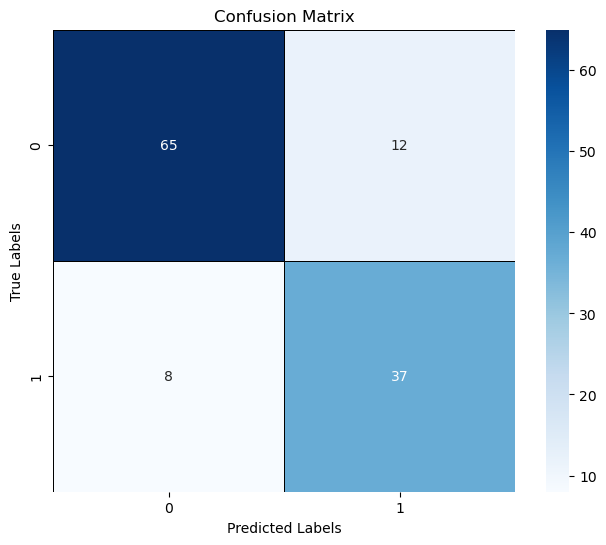

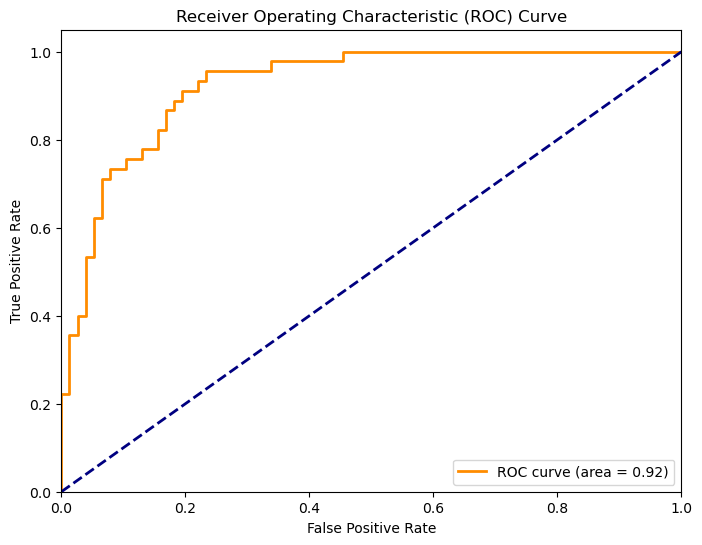

(NeuralNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (dropout): Dropout(p=0.15, inplace=False)
   (hidden_activation): ReLU()
   (output_activation): Sigmoid()
   (hidden_layer1): Linear(in_features=7, out_features=128, bias=True)
   (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
   (output_layer): Linear(in_features=64, out_features=1, bias=True)
   (output): Sigmoid()
   (batch_normalization1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (batch_normalization2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 ),
 0.7105263157894737)

In [31]:
base_model.batch_normalization = True
base_model.batch_normalization1 = nn.BatchNorm1d(128)
base_model.batch_normalization2 = nn.BatchNorm1d(64)
three_setups(base_model, base_model.optimizer, early_stop=None, scheduler = None) 

In [67]:
base_model = None
models = {'best_model1': accuracy1, 'best_model2': accuracy2, 'best_model3': accuracy3}

average_accuracies = {key: value for key, value in models.items()}

best_model = max(average_accuracies, key=average_accuracies.get)
highest_accuracy = average_accuracies[best_model]

if highest_accuracy > 0:
    print('Best Model:', best_model)
    print('Highest Average Accuracy:', highest_accuracy)
else:
    print('No models found.')


Best Model: best_model3
Highest Average Accuracy: 0.8026315789473685


References


In [692]:
#https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
#https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
#https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
#https://pytorch.org/ignite/generated/ignite.handlers.early_stopping.EarlyStopping.html
#https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
#https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ReduceLROnPlateau.html#
#https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
#https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
#https://pytorch.org/docs/stable/optim.html